In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn.glm.first_level import hemodynamic_models
import statsmodels.api as sm

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

sns.set(font_scale = 1.5)


/Users/jeanettemumford/.pyenv/versions/3.8.5/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
dat_type1_err_grin = pd.read_csv('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Output/group_type1_err_corr_by_rtdiff_output_nsim1000_nsub100_mu638_btwn_noise0.650.75_isi2_4.csv')
dat_type1_err_stroop = pd.read_csv('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Output/group_type1_err_corr_by_rtdiff_output_nsim1000_nsub100_mu530_btwn_noise0.650.6_isi2_4.csv')

dat_type1_err_grin['Settings'] = 'Forced Choice'
dat_type1_err_stroop['Settings'] = 'Stroop'

dat_type1_err = pd.concat([dat_type1_err_grin, dat_type1_err_stroop])

In [3]:
print(dat_type1_err.shape)
print(dat_type1_err_grin.shape)

(120, 9)
(60, 9)


In [4]:
scale_dictionary={"dv_scales_yes": "Scales with RT",
                  "dv_scales_no": "Does not scale with RT"}
dat_type1_err = dat_type1_err.replace({"Scale Type": scale_dictionary})
model_dictionary = {'Two stimulus types, no RT': 'Mod 1: Constant Duration, no RT',
                     'Two stimulus types, 2 RT dur only': 'Mod 2: RT Duration',
                     'Two stimulus types, RT mod': 'Mod 3: Constant Duration, RT'}
dat_type1_err = dat_type1_err.replace({"Model": model_dictionary})


color_hue_order = ['Mod 1: Constant Duration, no RT', 'Mod 2: RT Duration', 'Mod 3: Constant Duration, RT' ]

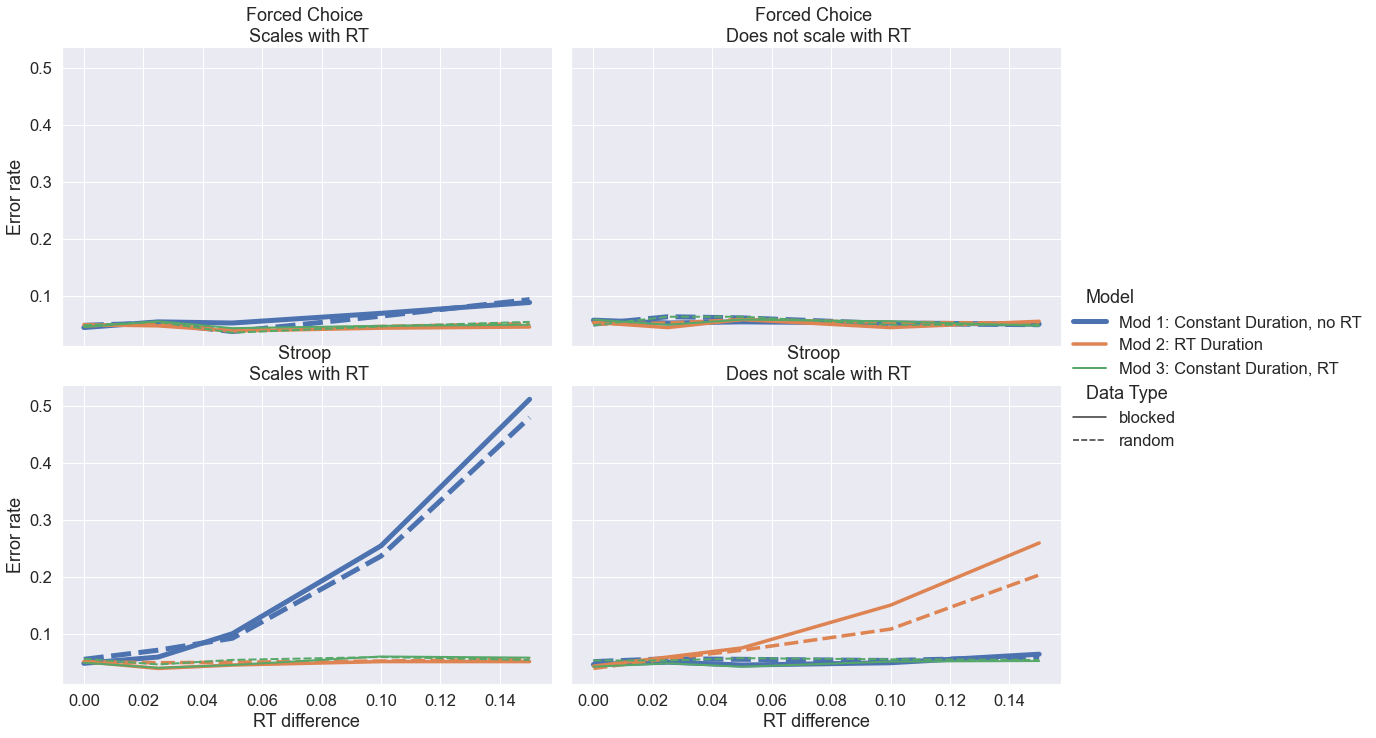

In [5]:


g = sns.relplot(data = dat_type1_err, x='RT diff', y='Rejection Rate', 
            hue = 'Model', style = 'Data Type', col = 'Scale Type', row = 'Settings',
            kind = 'line', hue_order = color_hue_order, height=5, aspect=1.5,
            size = 'Model', sizes=(2, 5),
            size_order=color_hue_order).set_titles("{row_name} \n {col_name}").set_axis_labels("RT difference", "Error rate")
#plt.tight_layout()
#plt.show()
plt.savefig('/Users/jeanettemumford/Dropbox/Research/Writing/RTGroup/Figures/type1_err_24.pdf')

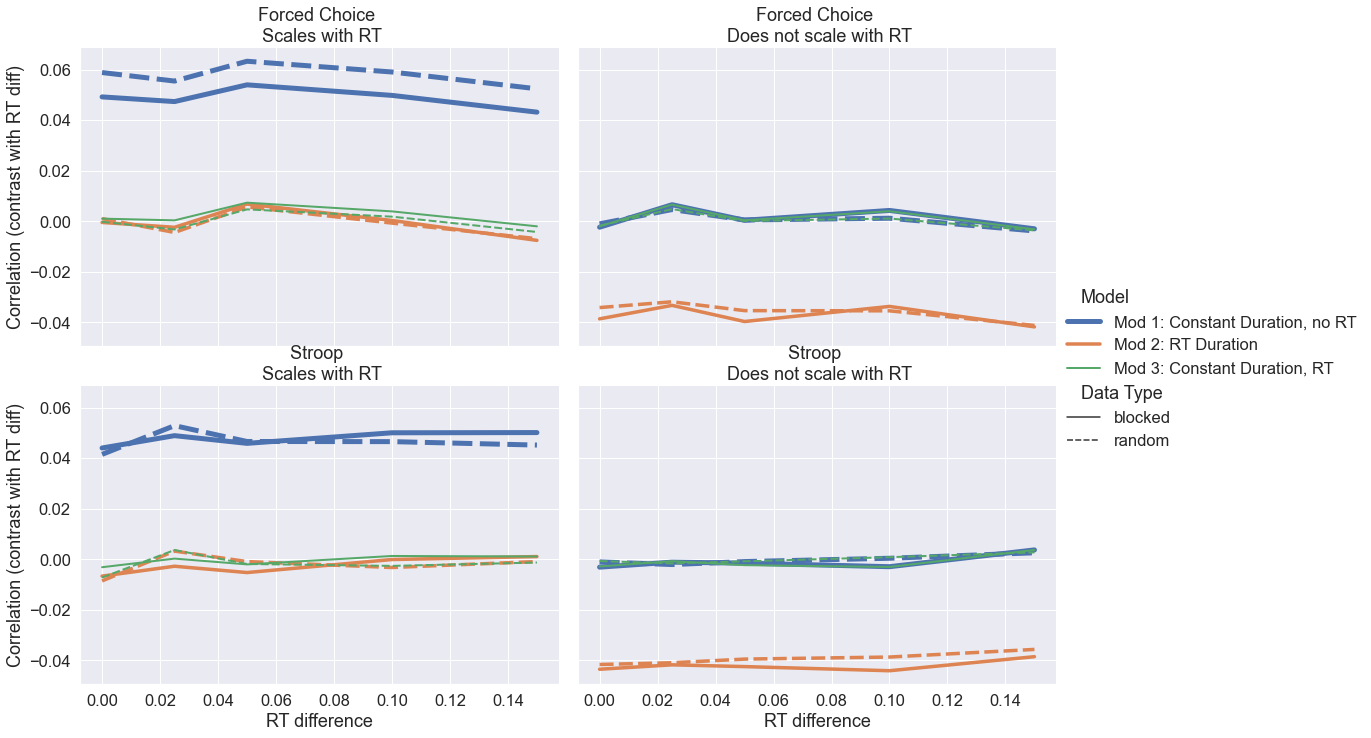

In [6]:
#g = sns.relplot(data = dat_type1_err, x='RT diff', y='Correlation (beta diff with rt diff)', 
#            hue = 'Model', style = 'Data Type', col = 'Scale Type',
#            kind = 'line', hue_order = color_hue_order).set_titles("{col_name}").set_axis_labels("RT diff", "Correlation (contrast with RT diff)")

g = sns.relplot(data = dat_type1_err, x='RT diff', y='Correlation (beta diff with rt diff)', 
            hue = 'Model', style = 'Data Type', col = 'Scale Type', row = 'Settings',
            kind = 'line', hue_order = color_hue_order, height=5, aspect=1.5,
            size = 'Model', sizes=(2, 5),
            size_order=color_hue_order).set_titles("{row_name} \n {col_name}").set_axis_labels("RT difference", "Correlation (contrast with RT diff)")
#plt.tight_layout()
#plt.show()
plt.savefig('/Users/jeanettemumford/Dropbox/Research/Writing/RTGroup/Figures/cor_with_rt.pdf')

In [7]:
dat_power_grin = pd.read_csv('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Output/group_power_output_nsim1000_nsub100_mu638_btwn_noise0.650.75_isi2_4.csv')
dat_power_stroop = pd.read_csv('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Output/group_power_output_nsim1000_nsub100_mu530_btwn_noise0.650.6_isi2_4.csv')

dat_power_grin['Settings'] = 'Forced Choice'
dat_power_stroop['Settings'] = 'Stroop'

dat_power = pd.concat([dat_power_grin, dat_power_stroop])

dat_power = dat_power.replace({"Scale Type": scale_dictionary})
dat_power = dat_power.replace({"Model": model_dictionary})



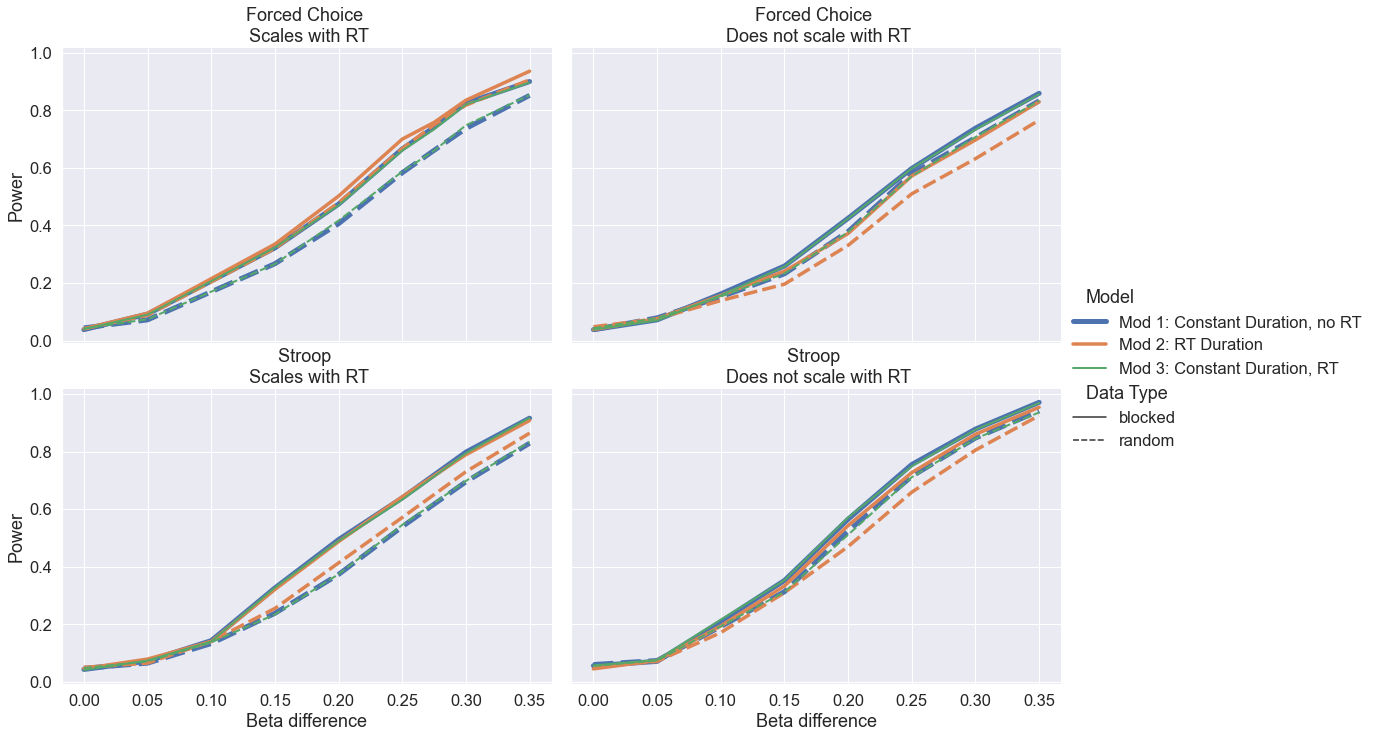

In [8]:
#sns.set(font_scale = 1.5, alpha = .6, linewidth = 2)
g = sns.relplot(data = dat_power[dat_power['Beta Contrast'] == 'beta_diff_est'], x='Beta diff', y='Rejection Rate', 
            hue = 'Model', style = 'Data Type', col = 'Scale Type', row = 'Settings',
            kind = 'line', hue_order = color_hue_order, height=5, aspect=1.5, size = 'Model', sizes=(2, 5),
            size_order=color_hue_order).set_titles("{row_name} \n {col_name}").set_axis_labels("Beta difference", "Power")
#plt.tight_layout()
#plt.show()
plt.savefig('/Users/jeanettemumford/Dropbox/Research/Writing/RTGroup/Figures/power_24.pdf')


#sns.relplot(data = dat_power[dat_power['Beta Contrast'] == 'beta_diff_est'], x='Beta diff', y='Rejection Rate', 
#            hue = 'Model', style = 'Data Type', col = 'Scale Type',
#            kind = 'line')

In [ ]:
# Check maximum power difference

Repeat for ISI 3-6

In [ ]:
dat_type1_err_grin = pd.read_csv('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Output/group_type1_err_corr_by_rtdiff_output_nsim1000_nsub100_mu638_btwn_noise0.650.75_isi3_6.csv')
dat_type1_err_stroop = pd.read_csv('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Output/group_type1_err_corr_by_rtdiff_output_nsim1000_nsub100_mu530_btwn_noise0.650.6_isi3_6.csv')

dat_type1_err_grin['Settings'] = 'Forced Choice'
dat_type1_err_stroop['Settings'] = 'Stroop'

dat_type1_err = pd.concat([dat_type1_err_grin, dat_type1_err_stroop])


scale_dictionary={"dv_scales_yes": "Scales with RT",
                  "dv_scales_no": "Does not scale with RT"}
dat_type1_err = dat_type1_err.replace({"Scale Type": scale_dictionary})
model_dictionary = {'Two stimulus types, no RT': 'Mod 1: Constant Duration, no RT',
                     'Two stimulus types, 2 RT dur only': 'Mod 2: RT Duration',
                     'Two stimulus types, RT mod': 'Mod 3: Constant Duration, RT'}
dat_type1_err = dat_type1_err.replace({"Model": model_dictionary})


color_hue_order = ['Mod 1: Constant Duration, no RT', 'Mod 2: RT Duration', 'Mod 3: Constant Duration, RT' ]

In [ ]:
g = sns.relplot(data = dat_type1_err, x='RT diff', y='Rejection Rate', 
            hue = 'Model', style = 'Data Type', col = 'Scale Type', row = 'Settings',
            kind = 'line', hue_order = color_hue_order, height=5, aspect=1.5,
            size = 'Model', sizes=(2, 5),
            size_order=color_hue_order).set_titles("{row_name} \n {col_name}").set_axis_labels("RT difference", "Error rate")
#plt.tight_layout()
#plt.show()
plt.savefig('/Users/jeanettemumford/Dropbox/Research/Writing/RTGroup/Figures/type1_err_36.pdf')

In [ ]:
g = sns.relplot(data = dat_type1_err, x='RT diff', y='Correlation (beta diff with rt diff)', 
            hue = 'Model', style = 'Data Type', col = 'Scale Type', row = 'Settings',
            kind = 'line', hue_order = color_hue_order, height=5, aspect=1.5,
            size = 'Model', sizes=(2, 5),
            size_order=color_hue_order).set_titles("{row_name} \n {col_name}").set_axis_labels("RT difference", "Correlation (contrast with RT diff)")

plt.savefig('/Users/jeanettemumford/Dropbox/Research/Writing/RTGroup/Figures/cor_with_rt_36.pdf')

In [ ]:
dat_power_grin = pd.read_csv('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Output/group_power_output_nsim1000_nsub100_mu638_btwn_noise0.650.75_isi3_6.csv')
dat_power_stroop = pd.read_csv('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Output/group_power_output_nsim1000_nsub100_mu530_btwn_noise0.650.6_isi3_6.csv')

dat_power_grin['Settings'] = 'Forced Choice'
dat_power_stroop['Settings'] = 'Stroop'

dat_power = pd.concat([dat_power_grin, dat_power_stroop])

dat_power = dat_power.replace({"Scale Type": scale_dictionary})
dat_power = dat_power.replace({"Model": model_dictionary})


In [ ]:
g = sns.relplot(data = dat_power[dat_power['Beta Contrast'] == 'beta_diff_est'], x='Beta diff', y='Rejection Rate', 
            hue = 'Model', style = 'Data Type', col = 'Scale Type', row = 'Settings',
            kind = 'line', hue_order = color_hue_order, height=5, aspect=1.5, size = 'Model', sizes=(2, 5),
            size_order=color_hue_order).set_titles("{row_name} \n {col_name}").set_axis_labels("Beta difference", "Power")
#plt.tight_layout()
#plt.show()
plt.savefig('/Users/jeanettemumford/Dropbox/Research/Writing/RTGroup/Figures/power_36.pdf')

In [ ]:
dur_val_point_1 = 0.1
true_duration = np.arange(0.01, 5, .01)
num_durs = len(true_duration)
est_bold_amplitude_point_1s = np.empty(true_duration.shape)*np.nan
est_bold_intercept_point_1s = np.empty(true_duration.shape)*np.nan
est_r2_point_1 = np.empty(true_duration.shape)*np.nan
frame_times = np.arange(0, 100, .2)
reg_point_1s, _ = hemodynamic_models.compute_regressor([[5], [dur_val_point_1], [1]],
                       'spm', frame_times, oversampling=16)
mod_reg_point_1s = sm.add_constant(reg_point_1s)
for ind, cur_dur in enumerate(true_duration):
    loop_3col_onsets = np.transpose(np.c_[5, cur_dur, 1])
    signal, _ = hemodynamic_models.compute_regressor(loop_3col_onsets,
                       'spm', frame_times, oversampling=16)
    mod_ols = sm.OLS(signal, mod_reg_point_1s).fit() 
    est_bold_amplitude_point_1s[ind] = mod_ols.params[1]
    est_bold_intercept_point_1s[ind] = mod_ols.params[0]
    est_r2_point_1[ind] = mod_ols.rsquared


dur_val = 1
true_duration = np.arange(0.01, 5, .01)
num_durs = len(true_duration)
est_bold_amplitude_1s = np.empty(true_duration.shape)*np.nan
est_bold_intercept_1s = np.empty(true_duration.shape)*np.nan
est_r2 = np.empty(true_duration.shape)*np.nan
frame_times = np.arange(0, 100, .2)
reg1s, _ = hemodynamic_models.compute_regressor([[5], [dur_val], [1]],
                       'spm', frame_times, oversampling=16)
mod_reg1s = sm.add_constant(reg1s)
for ind, cur_dur in enumerate(true_duration):
    loop_3col_onsets = np.transpose(np.c_[5, cur_dur, 1])
    signal, _ = hemodynamic_models.compute_regressor(loop_3col_onsets,
                       'spm', frame_times, oversampling=16)
    mod_ols = sm.OLS(signal, mod_reg1s).fit() 
    est_bold_amplitude_1s[ind] = mod_ols.params[1]
    est_bold_intercept_1s[ind] = mod_ols.params[0]
    est_r2[ind] = mod_ols.rsquared

In [ ]:

def abline_subplot(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

xvals_line = true_duration
yvals_line_point_1 = 1/dur_val_point_1*xvals_line
yvals_line_1 = 1/dur_val*xvals_line

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(true_duration, est_bold_amplitude_point_1s)
ax1.plot(true_duration, yvals_line_point_1)
ax1.set_xlabel("True Duration (s)")
ax1.set_ylabel("Estimated BOLD amplitude \n assuming 0.1s duration")
ax1.set_title("Duration = .1s")
ax2.plot(true_duration, est_bold_amplitude_1s)
ax2.plot(true_duration, yvals_line_1)
ax2.set_xlabel("True Duration (s)")
ax2.set_ylabel("Estimated BOLD amplitude \n assuming 1s duration")
ax2.set_title("Duration = 1s")
plt.tight_layout()
plt.savefig('/Users/jeanettemumford/Dropbox/Research/Writing/RTGroup/Figures/bold_fcn_rt.pdf')
